In [209]:
import numpy as np
from matplotlib import pyplot as plt

In [210]:
#Lenard Jonnes potencial

eps = 10.12
sig = 0.358

def V(r):
    return 4*eps*((sig/r)**12 - (sig/r)**6)

In [211]:
#Data

r = np.linspace(.2, 1.5, 1000)
v_r = V(r)

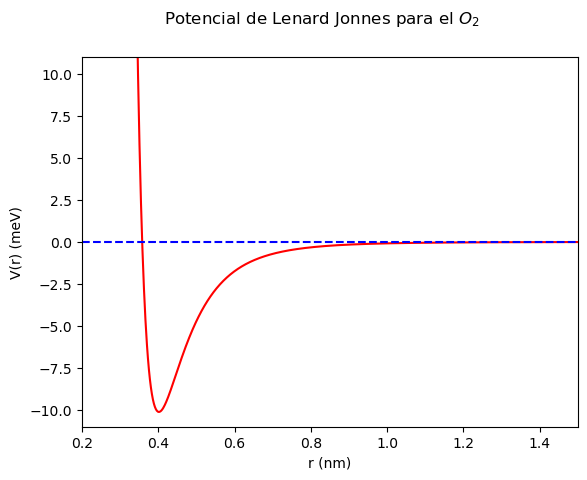

In [212]:
#Figure
fig = plt.figure()
fig.suptitle(r'Potencial de Lenard Jonnes para el $O_2$')
ax = fig.add_subplot()
ax.plot(r, v_r,'-r')
ax.plot(r,0*r,'--b')
plt.xlabel('r (nm)')
plt.ylabel('V(r) (meV)')
plt.ylim(-11,11)
plt.xlim(.2,1.5)
plt.savefig('lenardJonnes.png')

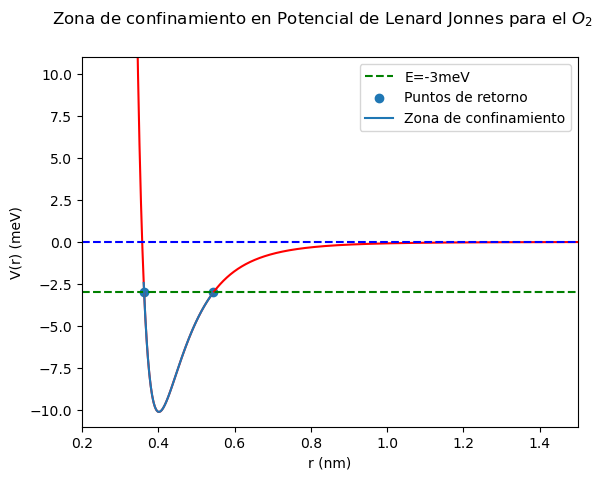

In [213]:
E = -3
r1 = 0.362
r2 = 0.543
conf = np.linspace(r2,r1)

#Figure
fig = plt.figure()
fig.suptitle(r'Zona de confinamiento en Potencial de Lenard Jonnes para el $O_2$')
ax = fig.add_subplot()
ax.plot(r, v_r,'-r')
ax.plot(r,0*r,'--b')
ax.plot(r,E*np.ones(r.size),'--g', label='E={}meV'.format(E))
ax.scatter([r1,r2], [E,E], label='Puntos de retorno')
ax.plot(conf, V(conf), label='Zona de confinamiento')
plt.xlabel('r (nm)')
plt.ylabel('V(r) (meV)')
plt.ylim(-11,11)
plt.xlim(.2,1.5)
plt.legend()
plt.savefig('Confinamiento.png')

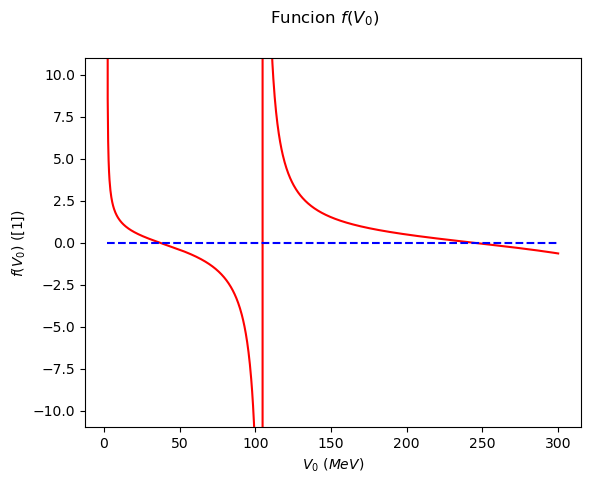

In [214]:
# Constantes
a = 2                  # Ancho del potencial [fm]
m_nc2 = 931.5          # Masa del nucleon [MeV]
hbarc = 197           # Constante reducida de Planck [Mevfm]
eps = 2.2              # Energia del estado base del deuterio [MeV]
K = (a**2*m_nc2)/(hbarc)**2

# Funcion para la ecuacion
def f(V0):
    return 1/np.tan(np.sqrt(K * (V0 - eps))) + np.sqrt(eps / (V0 - eps))

#Data

Vf = np.linspace(eps+0.001, 300, 1000)
F = f(Vf)

#Figure
fig = plt.figure()
fig.suptitle(r'Funcion $f(V_0)$')
ax = fig.add_subplot()
ax.plot(Vf, F,'-r')
plt.xlabel(r'$V_0 \ (MeV)$')
ax.plot(Vf,0*Vf,'--b')
plt.ylabel(r'$f(V_0) \ ([1])$')
plt.ylim(-11,11)
plt.savefig('funcionF.png')

In [215]:
# Metodo de la biseccion
def bisection(f, a, b, tol=1e-10, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("En el intervalo hay un numero par de raices")
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    raise ValueError("La biseccion no convergio")
    
# Intervalo inicial [a, b]
a, b = eps+0.001, 50
    
# Encontrar la solucion
try:
    sol = bisection(f, a, b)
    print(f"La solucion es V0 = {sol}")
except ValueError as e:
    print(e)

La solucion es V0 = 36.638874897124246


0.0

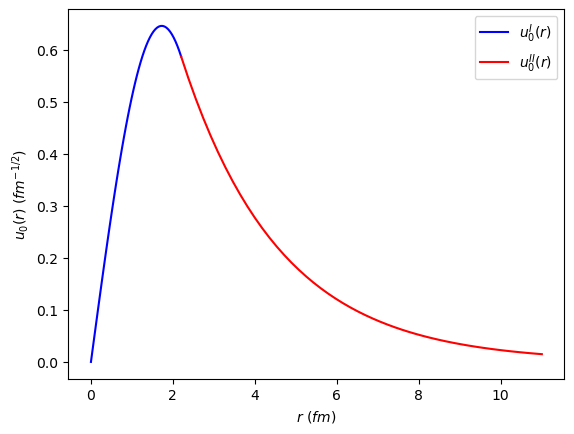

In [216]:
V_0 = sol

K_I = np.sqrt(m_nc2*(V_0 - eps)/hbarc**2)
K_II = -K_I/np.tan(K_I*a)

A = 1/np.sqrt((2*a*K_I - np.sin(2*a*K_I))/(4*K_I) + ((np.sin(K_I*a)*np.exp(K_II*a)**2)*np.exp(-2*K_II*a)/(2*K_II)))
D = A*np.sin(K_I*a)*np.exp(K_II*a)

def phi_I(r):
    return A*np.sin(K_I*r)

def phi_II(r):
    return D*np.exp(-K_II*r)

r_I = np.linspace(0, a)
P_I = phi_I(r_I)

r_II = np.linspace(a, 5*a)
P_II = phi_II(r_II)

plt.plot(r_I, P_I, '-b', r_II, P_II, '-r')
plt.legend([r'$u^I_0(r)$', r'$u^{II}_0(r)$'])
plt.ylabel(r'$u_0(r) \ (fm^{-1/2})$')
plt.xlabel(r'$r \ (fm)$')
plt.savefig('funcionOnda.png')

1/np.tan(K_I*a) + K_II/K_I

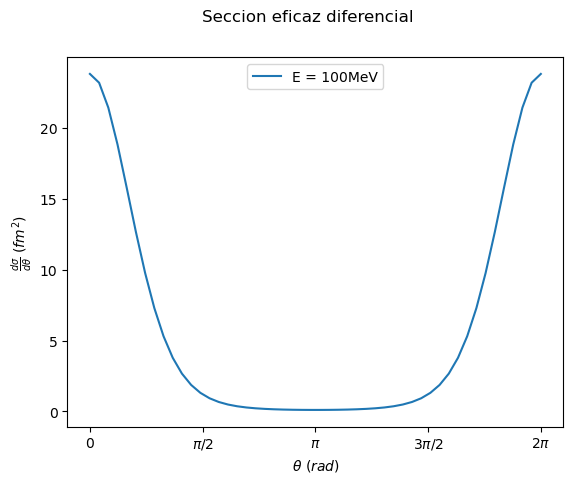

In [217]:
E = 100
K2 = m_nc2*E/hbarc**2

def dsig(theta): return ((np.pi*m_nc2**2)/(16*hbarc**4))*(110.3*np.exp(-4*K2*np.sin(theta/2)**2/5.95) + 348.5*np.exp(-4*K2*np.sin(theta/2)**2/2.57))**2

theta = np.linspace(0, 2*np.pi)
Dsig = dsig(theta)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(theta, Dsig, label='E = 100MeV')
plt.xlabel(r'$\theta \ (rad)$')
plt.ylabel(r'$\frac{d\sigma}{d\theta} \ (fm^2)$')
ax.legend()


ax.set_xticks(np.arange(0, 5)*np.pi/2, ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
fig.suptitle('Seccion eficaz diferencial')
plt.savefig('scattering.png')

/tmp/ipykernel_60443/2367253474.py:9: RuntimeWarning: invalid value encountered in divide
  return (((eb_v-ob_v)*P+ob_v)*A - ((eb_s-ob_s)*P+ob_s)*A**(2/3) - (((eb_sy-ob_sy)*P+ob_sy)/2)*((A-2*Z)**2)/A - ((eb_c-ob_c)*P+ob_c)*(Z**2)/A**(1/3) + (P*edel*(-1)**(Z%2))/(A**(0.5)))
/tmp/ipykernel_60443/2367253474.py:9: RuntimeWarning: divide by zero encountered in divide
  return (((eb_v-ob_v)*P+ob_v)*A - ((eb_s-ob_s)*P+ob_s)*A**(2/3) - (((eb_sy-ob_sy)*P+ob_sy)/2)*((A-2*Z)**2)/A - ((eb_c-ob_c)*P+ob_c)*(Z**2)/A**(1/3) + (P*edel*(-1)**(Z%2))/(A**(0.5)))


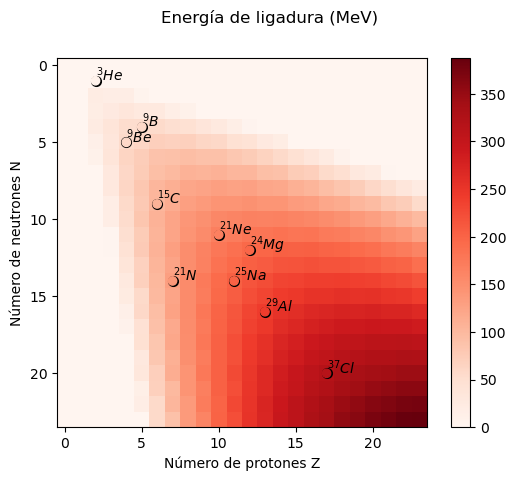

In [218]:
#Constantes
m_Nc2, m_pc2 = 939.6, 938.3
eb_v, eb_s, eb_sy, eb_c, edel = 16.2, 19, 47, 0.755, 12
ob_v, ob_s, ob_sy, ob_c, odel = 16.3, 19.2, 45.4, 0.77, 0

def Mc2(A, Z):
    #Paridad  
    P = (A%2 - 1)**2
    return (((eb_v-ob_v)*P+ob_v)*A - ((eb_s-ob_s)*P+ob_s)*A**(2/3) - (((eb_sy-ob_sy)*P+ob_sy)/2)*((A-2*Z)**2)/A - ((eb_c-ob_c)*P+ob_c)*(Z**2)/A**(1/3) + (P*edel*(-1)**(Z%2))/(A**(0.5)))

Z = np.arange(0,24)
N = np.arange(0,24)

Z, N = np.meshgrid(Z, N)

M = Mc2(Z+N, Z)
M[0,0]=0
M = np.zeros(M.shape) + M*(M>0)

#Experimentales
z =np.array([23, 7, 5, 2, 13, 6, 12, 4, 17, 10, 11, 23])
n = np.array([0, 14, 4, 1, 16, 9, 12, 5, 20, 11, 14, 23])
B_energy = np.array([0,6.609,6.257,2.572, 8.348, 7.1, 8.2607, 6.463, 8.570, 7.972, 8.1014, 0])*(z+n)
label = [r'$^{21}N$', r'$^{9}B$', r'$^{3}He$', r'$^{29}Al$', r'$^{15}C$', r'$^{24}Mg$', r'$^{9}Be$', r'$^{37}Cl$', r'$^{21}Ne$', r'$^{25}Na$']
B_energy[0], B_energy[-1] = M[-1,0], M[-1,-1]

for ii, tt in enumerate(label):
    plt.text(z[ii+1], n[ii+1], tt)

plt.set_cmap('Reds')
plt.imshow(M)
plt.colorbar()
plt.scatter(z[1:-1],n[1:-1],edgecolors='black', linewidths=2)
plt.scatter(z,n,c=B_energy)
plt.xlabel('Número de protones Z')
plt.ylabel('Número de neutrones N')
plt.suptitle('Energía de ligadura (MeV)')
plt.savefig('B_energy.png')

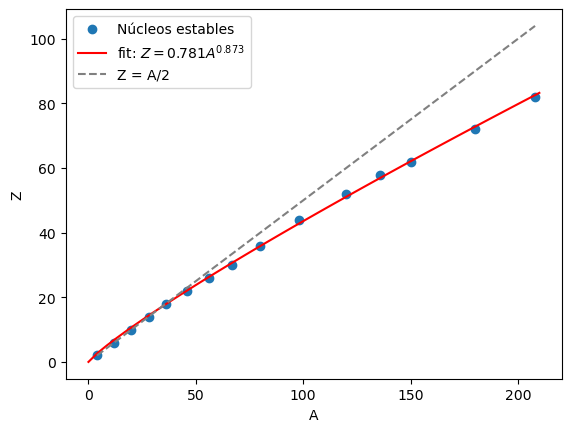

In [219]:
from scipy.optimize import curve_fit

a = [4, 12, 20, 28, 36, 46, 56, 67, 80, 98, 120, 136, 150, 180, 208]
z = [2, 6, 10, 14, 18, 22, 26, 30, 36, 44, 52, 58, 62, 72, 82]
B_A = [7.073, 7.68, 8.03, 8.44, 8.51, 8.65, 8.79, 8.73, 8.69, 8.62, 8.47, 8.37, 8.26, 8.03, 7.86]
labels = [r'$^{4}He$', r'$^{12}C$', r'$^{20}Ne$', r'$^{28}Si$', r'$^{36}Ar$', r'$^{46}Ti$', r'$^{56}Fe$', r'$^{67}Zn$', r'$^{80}Kr$', r'$^{98}Ru$', r'$^{120}Te$', r'$^{136}Ce$', r'$^{150}Sm$', r'$^{180}Hf$', r'$^{208}Pb$']

# Z = func(A)
def func(x, aa, bb):
    return aa*x**bb

popt, pcov = curve_fit(func, a, z)

plt.scatter(a, z, label = 'Núcleos estables')
a_t = np.linspace(0, 210)
plt.plot(a_t, func(a_t, *popt), '-r', label = r'fit: $Z = %.3f A^{ %.3f }$'%(popt[0], popt[1]))
plt.plot(a, np.array(a)/2, '--', color='gray', label='Z = A/2')
plt.xlabel('A')
plt.ylabel('Z')
plt.legend()
plt.savefig('fit.png')

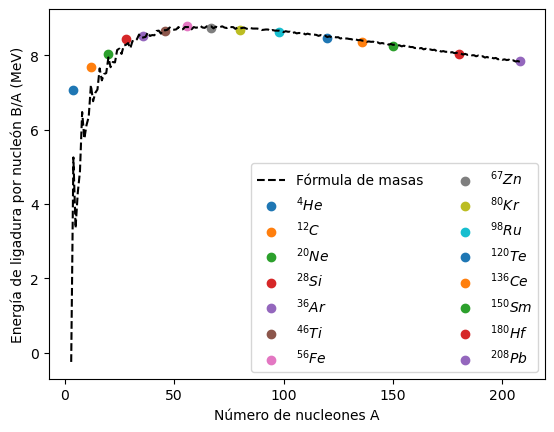

In [220]:
A = np.arange(3, 210)
plt.plot(A, Mc2(A, func(A, *popt).astype(np.int32))/A, '--k', label = 'Fórmula de masas')

for ii, tt in enumerate(labels):
    plt.scatter(a[ii], B_A[ii], label = tt)

plt.xlabel('Número de nucleones A')
plt.ylabel('Energía de ligadura por nucleón B/A (MeV)')
plt.legend(loc='lower right', ncols=2)
plt.savefig('B_A.png')